In [1]:
import pandas as pd 
df=pd.read_csv(r"/Users/priyankamalavade/Desktop/Clickstream-Customer Conversion Analysis/data/e-shop clothing 2008.csv",sep=';')
df

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1


## Data Cleaning and Preprocessing

In [2]:
#Combine the year, month, and day columns into a single date column
df['date']=pd.to_datetime(df[['year','month','day']])
#Drop the original year,month,day columns
df.drop(['year','month','day'],axis=1,inplace=True)
#convert the date column into datetime format
df['date']=pd.to_datetime(df['date'],format='%Y %m %d')



In [3]:
df.head()

,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page,date
0,1,29,1,1,A13,1,5,1,28,2,1,2008-04-01
1,2,29,1,1,A16,1,6,1,33,2,1,2008-04-01
2,3,29,1,2,B4,10,2,1,52,1,1,2008-04-01
3,4,29,1,2,B17,6,6,2,38,2,1,2008-04-01
4,5,29,1,2,B8,4,3,2,52,1,1,2008-04-01


In [4]:
#Sort the data based on session ID and order to maintain clickstream flow.

df = df.sort_values(by=['session ID', 'order'])



In [5]:
#Rename columns to simpler names (no spaces or special characters).
#Clean up column names
#Remove spaces,parenthesis and convert to lower case

df.columns = df.columns.str.replace(' ', '_') \
                       .str.replace('(', '') \
                       .str.replace(')', '') \
                       .str.lower()

In [6]:
#Check for missing values or duplicates
print(df.isnull().sum())
print(df.duplicated().sum())
#check the data type of each column 
print(df.dtypes)

order                    0
country                  0
session_id               0
page_1_main_category     0
page_2_clothing_model    0
colour                   0
location                 0
model_photography        0
price                    0
price_2                  0
page                     0
date                     0
dtype: int64
0
order                             int64
country                           int64
session_id                        int64
page_1_main_category              int64
page_2_clothing_model            object
colour                            int64
location                          int64
model_photography                 int64
price                             int64
price_2                           int64
page                              int64
date                     datetime64[ns]
dtype: object


In [7]:
print("Cleaned column names:")
print(df.columns.tolist())

Cleaned column names:
['order', 'country', 'session_id', 'page_1_main_category', 'page_2_clothing_model', 'colour', 'location', 'model_photography', 'price', 'price_2', 'page', 'date']


## Basic Exploration & Understanding User Behavior


### 🎯 Goal:
Understand how users behave within sessions:

1) How many sessions exist?

2) How many pages does a user typically visit in a session?

3) What is the average session length (in clicks)?

4) Distribution of page_1_main_category (main categories)

In [8]:
#Number of unique sessions 
print("Number of unique sessions:",df['session_id'].nunique())


Number of unique sessions: 24026


* Sessions are quite short on average (median = 4 clicks).

In [9]:
#Count number of events (clicks) per session
session_lengths = df.groupby('session_id').size()

print("Number of events(clicks) per session:")
print(session_lengths.describe())


Number of events(clicks) per session:
count    24026.000000
mean         6.887289
std          8.995161
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max        195.000000
dtype: float64


* A few outlier sessions with up to 195 clicks indicate intense browsing


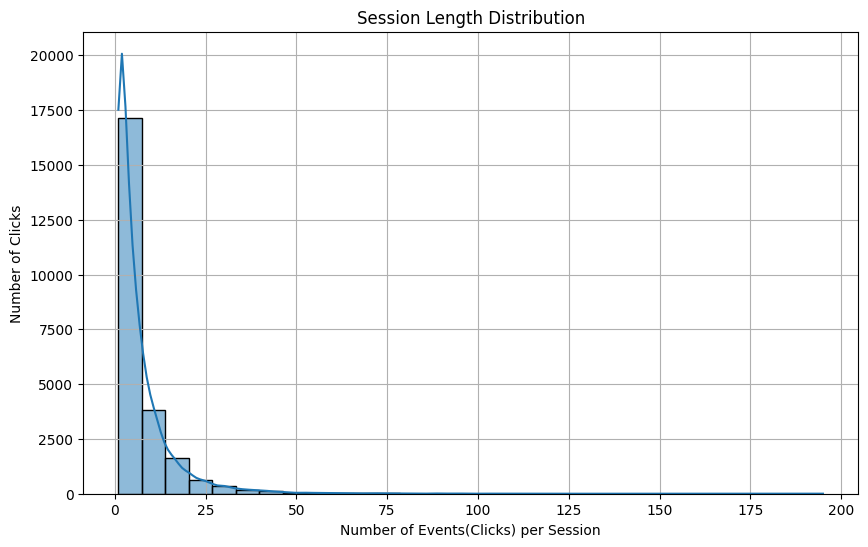

In [10]:
#Plot session length distribution 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(session_lengths,bins=30,kde=True)
plt.title('Session Length Distribution')
plt.xlabel('Number of Events(Clicks) per Session')
plt.ylabel('Number of Clicks')
plt.grid(True)
plt.show()


In [11]:
#Most viewed main categories
top_categories = df['page_1_main_category'].value_counts().head(10)
print("\nTop 10 Most Viewed Main Categories:")
print(top_categories)



Top 10 Most Viewed Main Categories:
page_1_main_category
1    49742
4    38747
3    38577
2    38408
Name: count, dtype: int64


* The most viewed main categories (1–4) dominate user interest



# Funnel Analysis – Drop-off & Conversion Trends

Let's assume that the last click in each session can represent a proxy for conversion (since we don’t have cart/purchase flags). If that last click has a high price, we can guess that the session had serious purchase inten


Conversion Count by Main Category:
page_1_main_category
1    6671
2    6056
4    5757
3    5542
Name: count, dtype: int64


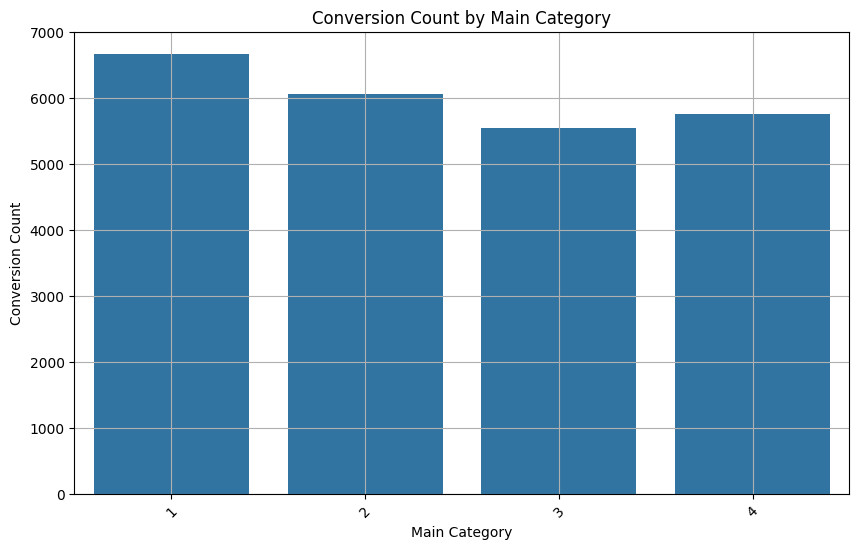


Conversion Rate by Main Category:
page_1_main_category
1    0.134112
2    0.157675
3    0.143661
4    0.148579
Name: count, dtype: float64


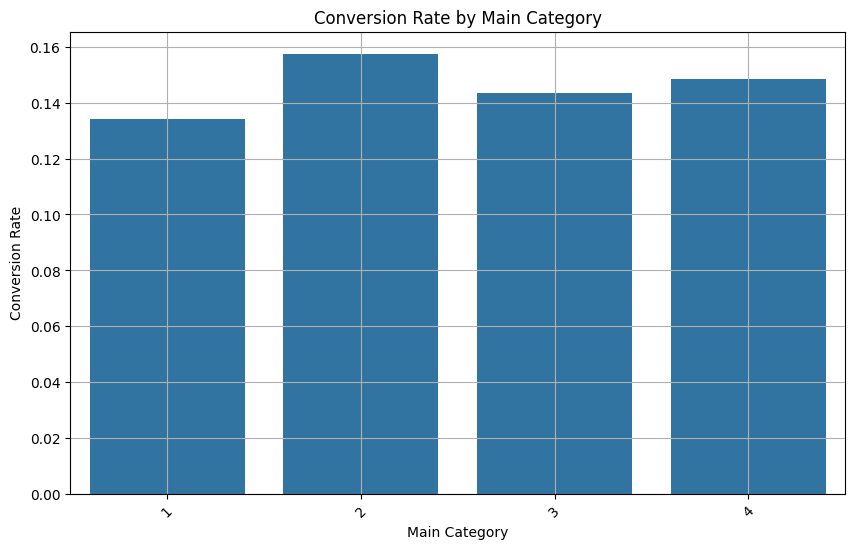

In [12]:
#Get the last interaction of each session (possible 'conversion')
last_interaction=df.groupby('session_id').last().reset_index()
#Count the number of conversions
conversion_count=last_interaction['page_1_main_category'].value_counts()
print("\nConversion Count by Main Category:")
print(conversion_count)
#plot conversion count by main category
plt.figure(figsize=(10,6))
sns.barplot(x=conversion_count.index,y=conversion_count.values)
plt.title('Conversion Count by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Conversion Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
#conversion rate by main category
conversion_rate=conversion_count/top_categories
print("\nConversion Rate by Main Category:")
print(conversion_rate)
#plot conversion rate by main category
plt.figure(figsize=(10,6))
sns.barplot(x=conversion_rate.index,y=conversion_rate.values)
plt.title('Conversion Rate by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


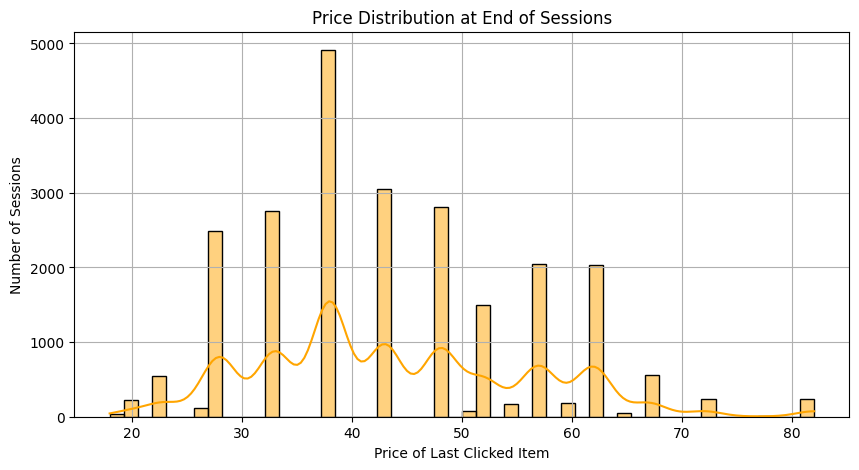

In [13]:
#Get the last interaction of each session (possible 'conversion')
last_clicks = df.groupby('session_id').tail(1)

#Visualize price of item in last clicks
plt.figure(figsize=(10, 5))
sns.histplot(last_clicks['price'], bins=50, color='orange', kde=True)
plt.title('Price Distribution at End of Sessions')
plt.xlabel('Price of Last Clicked Item')
plt.ylabel('Number of Sessions')
plt.grid(True)
plt.show()

In [14]:
#Calculate sessions ending with high-value items
high_price_threshold = 50  # You can adjust this threshold
high_value_sessions = last_clicks[last_clicks['price'] > high_price_threshold]

conversion_like_sessions = len(high_value_sessions)
total_sessions = df['session_id'].nunique()
conversion_rate = conversion_like_sessions / total_sessions * 100
print(f"\n Percentage of Sessions Ending with High Value Items: {conversion_rate:.2f}%")





 Percentage of Sessions Ending with High Value Items: 29.21%


* ~29.21% of sessions ended with clicks on high-value items (price > 50) — a strong indicator of potential conversions or high purchase intent

# Cohort Analysis – User Retention Over Time

How user activity changes over time (e.g., do people return and browse again on different days?)

Using session_id and date to group sessions by first visit and track if sessions repeat over time — this gives us a retention-like pattern

In [15]:
#Get first visit date for each session
session_dates = df[['session_id', 'date']].drop_duplicates()
first_visit = session_dates.groupby('session_id')['date'].min().reset_index()
first_visit.columns = ['session_id', 'first_visit_date']

#Merge first visit data with the original data
df_with_visit=pd.merge(df, first_visit, on='session_id', how  ='left')


In [16]:
#Calculate days since first visit (cohort day)
df_with_visit['days_since_first_visit'] = (df_with_visit['date'] - df_with_visit['first_visit_date']).dt.days



In [17]:
#Create cohort retention table
cohort_pivot = df_with_visit.pivot_table(
    index='first_visit_date',
    columns='days_since_first_visit',
    values='session_id',
    aggfunc='nunique'
).fillna(0)

In [18]:
cohort_pivot

days_since_first_visit,0
first_visit_date,
2008-04-01,477
2008-04-02,480
2008-04-03,276
2008-04-04,266
2008-04-05,199
...,...
2008-08-09,136
2008-08-10,128
2008-08-11,178


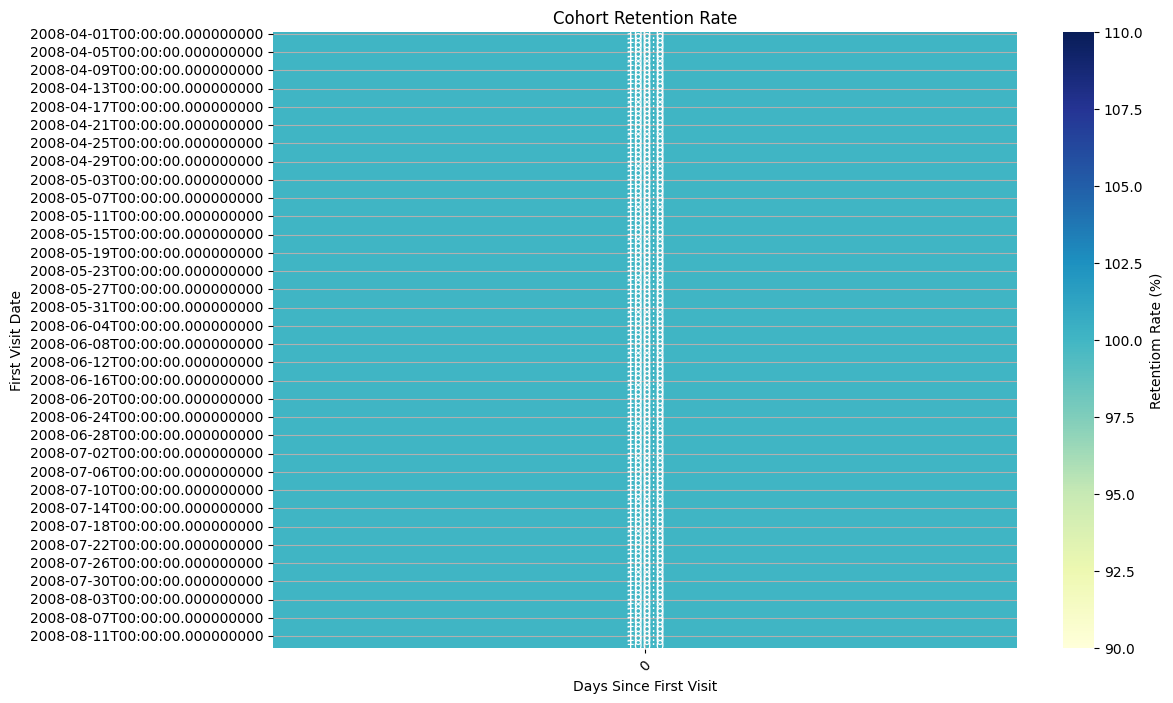

In [19]:
#convert to % retained
cohort_size = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_size, axis=0).round(3)
retention = retention * 100
retention
#plot cohort retention
plt.figure(figsize=(12,8))
sns.heatmap(retention, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Retentiom Rate (%)'})
plt.title('Cohort Retention Rate')
plt.xlabel('Days Since First Visit')
plt.ylabel('First Visit Date')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.grid(True)
plt.show()

           

In [20]:
retention

days_since_first_visit,0
first_visit_date,
2008-04-01,100.0
2008-04-02,100.0
2008-04-03,100.0
2008-04-04,100.0
2008-04-05,100.0
...,...
2008-08-09,100.0
2008-08-10,100.0
2008-08-11,100.0


#  Behavioral Insight

* The above output shows 100% retention on Day 0 for each cohort, which is expected. Day 0 represents the first visit, so naturally every session is present on that day.

* However, since all other days are missing, it means users (sessions) didn't return after the first visit, or the dataset treats each session as a one-time visit only.

1) Most visitors never returned again — sessions are one-time only.

2) This has major implications for conversion optimization:

3) You need to convert users on the first visit, since repeat visits are rare.

4) Emphasize clear CTAs, fast navigation, personalized recommendations on first contact.




# Behavioral Segmentation

1) Short vs. long sessions (number of events per session)

2) Low vs. high average item price viewed

3) Single-category vs. multi-category explorers

This helps you profile user types.



In [21]:
 #Aggregate behavioral metrics per session
session_metrics = df.groupby('session_id').agg({
    'price': ['mean', 'max', 'count'],
    'page_1_main_category': pd.Series.nunique
}).reset_index()

In [22]:
session_metrics

session_id      price           page_1_main_category
                       mean max count              nunique
0              1  42.111111  57     9                    4
1              2  50.000000  67    10                    3
2              3  42.166667  48     6                    3
3              4  45.250000  62     4                    2
4              5  57.000000  57     1                    1
...          ...        ...  ..   ...                  ...
24021      24022  29.666667  33     3                    1
24022      24023  35.142857  38     7                    2
24023      24024  67.000000  67     1                    1
24024      24025  62.000000  62     1                    1
24025      24026  47.666667  57     3                    3

[24026 rows x 5 columns]

In [23]:
#Rename columns for clarity 
session_metrics.columns = ['session_id', 'avg_price', 'max_price', 'num_events', 'unique_categories']


In [24]:
session_metrics

,session_id,avg_price,max_price,num_events,unique_categories
0,1,42.111111,57,9,4
1,2,50.000000,67,10,3
2,3,42.166667,48,6,3
3,4,45.250000,62,4,2
4,5,57.000000,57,1,1
...,...,...,...,...,...
24021,24022,29.666667,33,3,1
24022,24023,35.142857,38,7,2
24023,24024,67.000000,67,1,1
24024,24025,62.000000,62,1,1


In [25]:
#Add segmentation labels
session_metrics['session_length'] = pd.cut(session_metrics['num_events'],
                                           bins=[0, 3, 7, 15, 200],
                                           labels=['short', 'medium', 'long', 'very_long'])

session_metrics['explorer_type'] = pd.cut(session_metrics['unique_categories'],
                                          bins=[0, 1, 2, 10],
                                          labels=['focused', 'broad', 'very_broad'])

In [26]:
session_metrics['session_length']

0          long
1          long
2        medium
3        medium
4         short
          ...  
24021     short
24022    medium
24023     short
24024     short
24025     short
Name: session_length, Length: 24026, dtype: category
Categories (4, object): ['short' < 'medium' < 'long' < 'very_long']

In [27]:
session_metrics['explorer_type']

0        very_broad
1        very_broad
2        very_broad
3             broad
4           focused
            ...    
24021       focused
24022         broad
24023       focused
24024       focused
24025    very_broad
Name: explorer_type, Length: 24026, dtype: category
Categories (3, object): ['focused' < 'broad' < 'very_broad']

Session Length Distribution:
session_length
short        10982
medium        6149
long          4424
very_long     2471
Name: count, dtype: int64

Explorer Type Distribution:
explorer_type
focused       11306
broad          6708
very_broad     6012
Name: count, dtype: int64


/var/folders/04/gq_w2km90pjc_9np76jkv7q80000gn/T/ipykernel_2926/4115934635.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=session_metrics, x='session_length', palette='pastel')
/Users/priyankamalavade/Desktop/Clickstream-Customer Conversion Analysis/clickstream_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


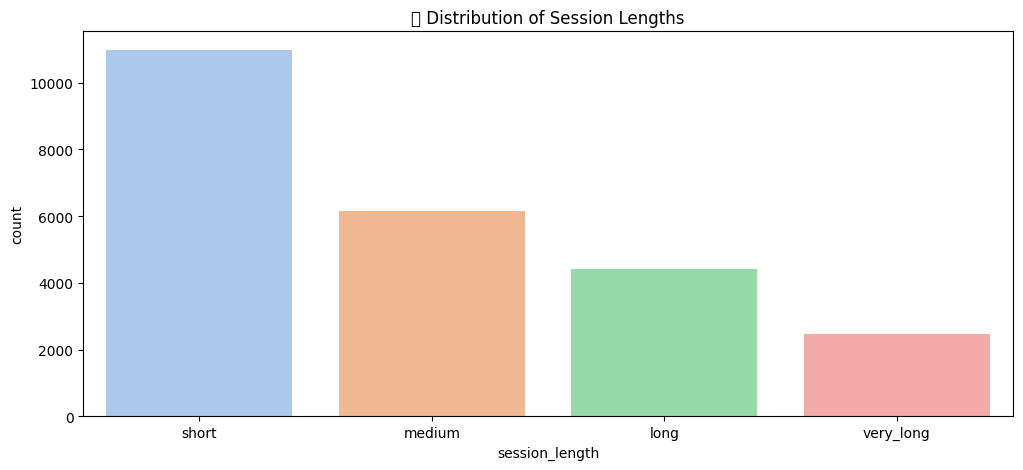

In [28]:
# Session length distribution
print("Session Length Distribution:")
print(session_metrics['session_length'].value_counts())

# Explorer types
print("\nExplorer Type Distribution:")
print(session_metrics['explorer_type'].value_counts())

# Quick plot
plt.figure(figsize=(12, 5))
sns.countplot(data=session_metrics, x='session_length', palette='pastel')
plt.title('📊 Distribution of Session Lengths')
plt.show()


##  Session Length Distribution

| **Session Length** | **Count** | **Insight** |
|--------------------|-----------|-------------|
| **Short**          | 10,982    | Majority of sessions have ≤3 clicks – users bounce quickly. |
| **Medium**         | 6,149     | Some exploration, possibly browsing specific products. |
| **Long**           | 4,424     | High engagement – deeper browsing. |
| **Very Long**      | 2,471     | Power users or confused users? Need more context. |

---

##  Explorer Type Distribution

| **Explorer Type**  | **Count** | **Insight** |
|--------------------|-----------|-------------|
| **Focused**        | 11,306    | Users stuck to one main category (e.g., only shirts). |
| **Broad**          | 6,708     | Explored 2 different categories. |
| **Very Broad**     | 6,012     | Browsed 3+ categories – could indicate window shopping or interest in variety. |


# Conversion Funnel Analysis 



* Define Each Funnel Stage

We’ll define four stages:

1) Landed – Total unique sessions.

2) High Value Viewers – Sessions with at least one high-priced item (e.g., price > 50).

3) Engaged Sessions – Sessions with more than 6 clicks.

4) Variety Seekers – Sessions that viewed items from more than 1 main category.



In [29]:
#Total sessions (Stage 1: Landed)
total_sessions = df['session_id'].nunique()
print("Total sessions (Landed):", total_sessions)


Total sessions (Landed): 24026


In [30]:
#High Value Viewers (price > 50)
high_value_sessions = df[df['price'] > 50]['session_id'].nunique()
print("Sessions viewing high-value items:", high_value_sessions)


Sessions viewing high-value items: 15834


In [31]:
#Engaged Sessions (clicks > 6 per session)
session_clicks = df.groupby('session_id').size()
engaged_sessions = session_clicks[session_clicks > 6].count()
print("Engaged sessions (more than 6 clicks):", engaged_sessions)



Engaged sessions (more than 6 clicks): 8012


In [32]:
#Variety Seekers (sessions with more than 1 unique main category)
session_category_counts = df.groupby('session_id')['page_1_main_category'].nunique()
variety_sessions = session_category_counts[session_category_counts > 1].count()
print("Variety-seeking sessions (more than 1 category):", variety_sessions)

Variety-seeking sessions (more than 1 category): 12720


| Funnel Stage                                | Count  | % of Total | Insight                                                               |
| ------------------------------------------- | ------ | ---------- | --------------------------------------------------------------------- |
|  **Landed on Site**                       | 24,026 | 100%       | All user sessions recorded.                                           |
|  **Viewed High-Value Items** (price > 50) | 15,834 | 65.9%      | Majority of users showed interest in premium-priced products.         |
| ⏱ **Engaged Sessions** (>6 clicks)         | 8,012  | 33.3%      | One-third of users were deeply engaged with content.                  |
|  **Variety Seekers** (>1 category)        | 12,720 | 52.9%      | Over half browsed across multiple categories — indicates exploration. |


/var/folders/04/gq_w2km90pjc_9np76jkv7q80000gn/T/ipykernel_2926/2216127438.py:49: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/priyankamalavade/Desktop/Clickstream-Customer Conversion Analysis/clickstream_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


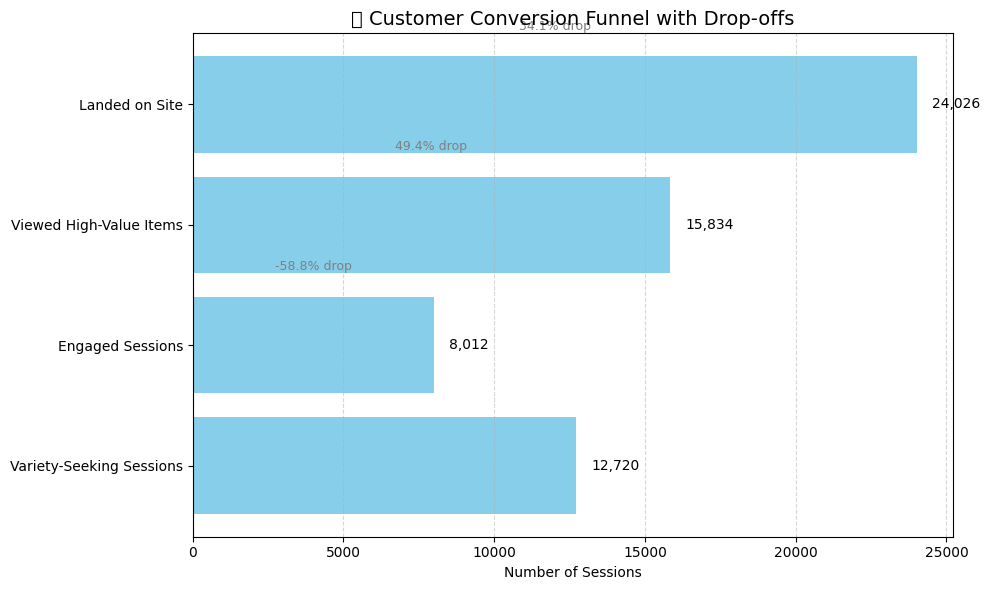

In [ ]:

#  Define counts
total_sessions = 24026
high_value_sessions = 15834
engaged_sessions = 8012
variety_sessions = 12720

#  Define funnel labels and values
funnel_stages = [
    'Landed on Site',
    'Viewed High-Value Items',
    'Engaged Sessions',
    'Variety-Seeking Sessions'
]

funnel_values = [
    total_sessions,
    high_value_sessions,
    engaged_sessions,
    variety_sessions
]

#  Calculate drop-off percentages
dropoffs = []
for i in range(len(funnel_values)-1):
    prev = funnel_values[i]
    curr = funnel_values[i+1]
    drop = ((prev - curr) / prev) * 100
    dropoffs.append(f"{drop:.1f}% drop")

#  Plot funnel chart
plt.figure(figsize=(10, 6))
bars = plt.barh(funnel_stages, funnel_values, color='skyblue')
plt.gca().invert_yaxis()
plt.title(" Customer Conversion Funnel with Drop-offs", fontsize=14)
plt.xlabel("Number of Sessions")
plt.grid(axis='x', linestyle='--', alpha=0.5)

#  Add value labels + drop-off labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 500, bar.get_y() + bar.get_height()/2,
             f'{int(width):,}', va='center', fontsize=10)
    
    # Add drop-off between bars
    if i < len(bars) - 1:
        plt.text(width / 2, bar.get_y() - 0.25,
                 dropoffs[i], ha='center', va='center', fontsize=9, color='gray')

plt.tight_layout()
plt.show()
